In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from models import AlexNet
import os
import sys
sys.path.append('..')
import visualization
from visualization.gradcam import GradCam
from visualization import misc_functions
from visualization.misc_functions import get_params, save_class_activation_on_image, show_class_activation_on_image

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
data_dir = '../data/'
classes = sorted(os.listdir(data_dir + 'test/'))
batch_size = 64

In [3]:
mean = [0.44947562, 0.46524084, 0.40037745]
std = [0.18456618, 0.16353698, 0.20014246]

data_transforms = {
        'test': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean, std)])}

test_images = datasets.ImageFolder(os.path.join(data_dir, 'test'),
                    data_transforms['test'])

test_dataloader = DataLoader(test_images, batch_size=batch_size, shuffle=False, num_workers=4)

In [4]:
model = AlexNet()
model.load_state_dict(torch.load('alexnet_model', map_location=str(device)))
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=12544, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_featur

In [5]:
def imshow(filters, num_cols, title=None):
    filters = np.asarray(filters)
    filters = np.asarray(std).mean() * filters + np.asarray(mean).mean()
    filters = np.clip(filters, 0, 1)
    num_rows = 1
    fig = plt.figure(figsize=(num_cols, num_rows ))
    i = 0
    for kernel in filters:
        ax1 = fig.add_subplot(num_rows, num_cols, i+1)
        ax1.imshow(kernel, interpolation='none')
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        i += 1
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

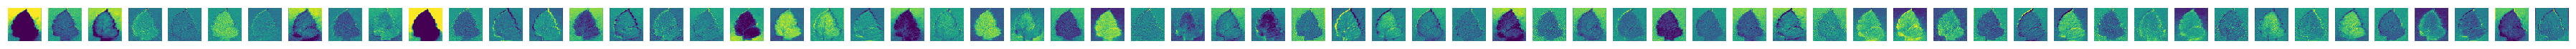

In [6]:
with torch.no_grad():
    for data in test_dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        for layer in model.get_features:
            outputs = layer(inputs)
            inputs = outputs
            if isinstance(layer, nn.Conv2d):
                for i in range(len(outputs)):
                    imshow(outputs[i], outputs[i].size()[0])
                    break
                break
        break

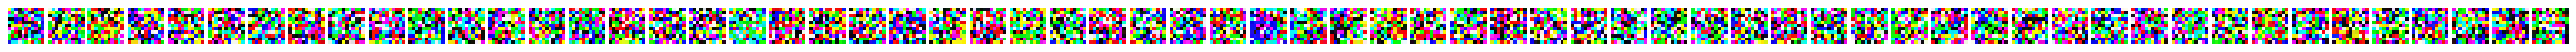

In [7]:
def plot_kernels(tensor, num_cols):
    """
    mean = 0.5
    std = 0.5
    maxVal = tensor.max()
    minVal = abs(tensor.min())
    maxVal = max(maxVal,minVal)
    tensor = tensor / maxVal
    tensor = tensor / 2
    tensor = tensor + 0.5
    """
    #tensor = tensor * np.asarray(std).mean() + np.asarray(mean).mean()
    num_rows = 1
    fig = plt.figure(figsize=(num_cols, num_rows))
    i = 0
    for t in tensor:
        ax1 = fig.add_subplot(num_rows, num_cols, i+1)
        pilTrans = transforms.ToPILImage()
        pilImg = pilTrans(t)
        ax1.imshow(pilImg, interpolation='none')
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        i += 1
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()
    
for m in model.modules():
    if isinstance(m, nn.Conv2d):
        plot_kernels(m.weight.data, len(m.weight.data))
        break


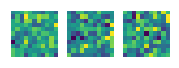

In [8]:
# plot filter by filter
for m in model.modules():
    if isinstance(m, nn.Conv2d):
        for i in range(m.weight.shape[0]):
            imshow(m.weight.data[i], m.weight.shape[0])
            break
        break

In [5]:
from sklearn.manifold import TSNE

perplexity=20
tsne = TSNE(learning_rate=50, random_state=1234)
tsne_result = tsne.fit_transform(model.get_classifier[4].weight.data)

KeyboardInterrupt: 

In [12]:
features = {'x':tsne_result[:,0], 'y':tsne_result[:,1]}
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)
ax.set_title('t-SNE (2 Components)', fontsize = 20)
targets = classes
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    #indicesToKeep = features['classes'] == target
    ax.scatter(features['x'], features['y'], c=color, s=50)
ax.legend(targets)
ax.grid()

In [6]:
def image_show(img):
    img = np.asarray(std).mean() * img + np.asarray(mean).mean()
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    plt.pause(0.001)

Tomato_mosaic_virus


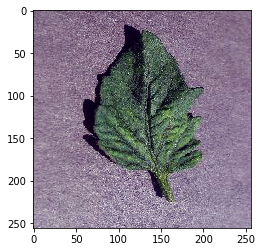

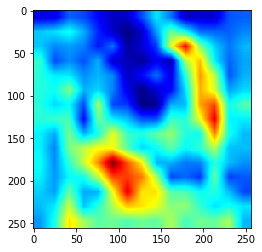

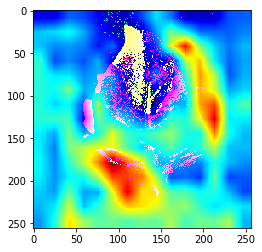

Tomato_mosaic_virus


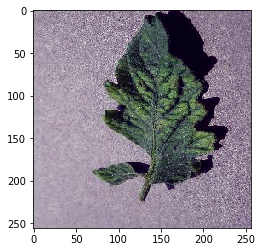

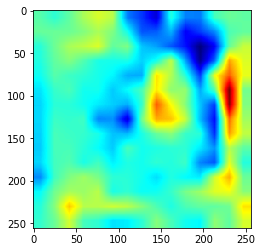

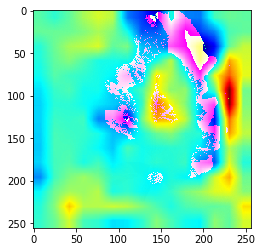

Tomato_mosaic_virus


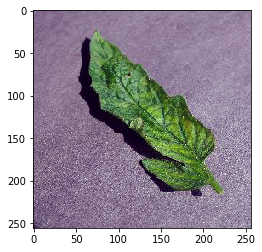

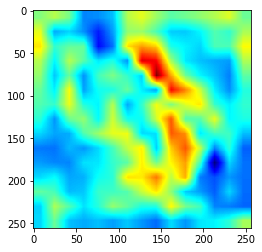

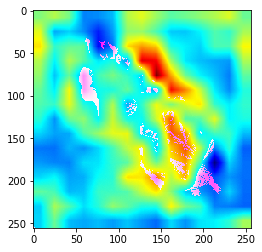

Tomato_mosaic_virus


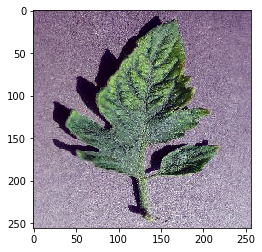

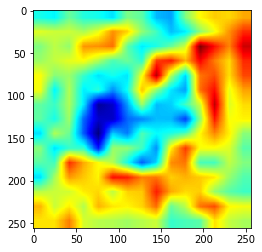

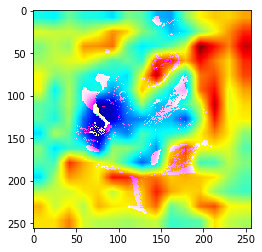

Tomato_mosaic_virus


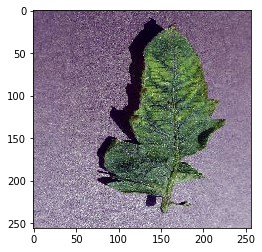

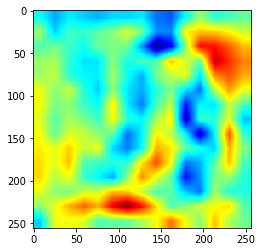

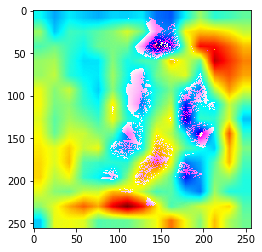

Tomato_mosaic_virus


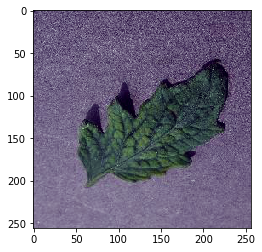

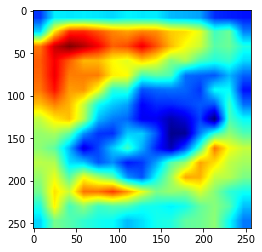

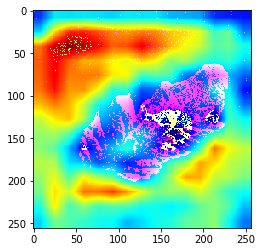

Tomato_mosaic_virus


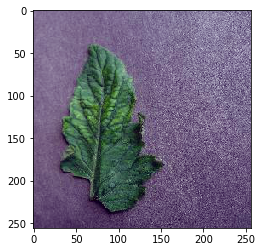

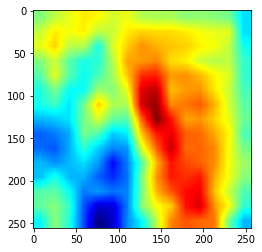

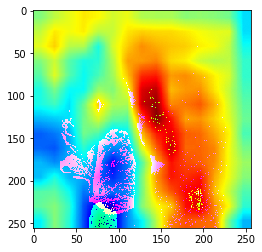

Tomato_mosaic_virus


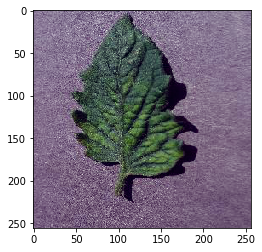

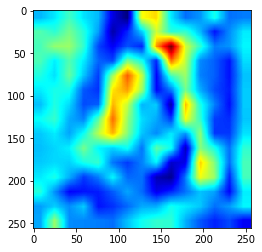

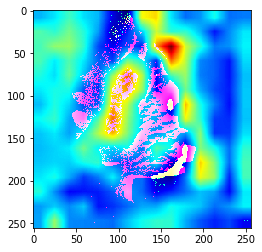

Tomato_mosaic_virus


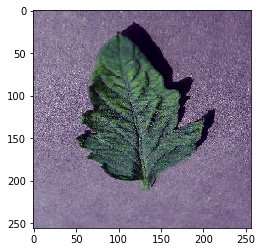

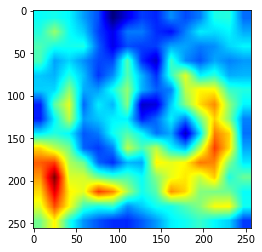

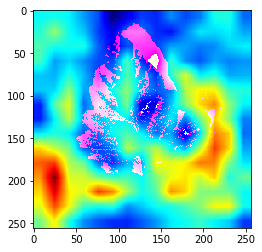

Tomato_mosaic_virus


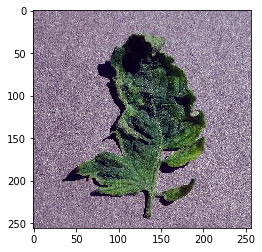

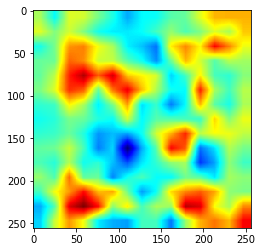

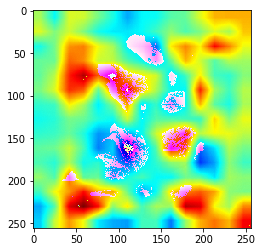

Tomato_mosaic_virus


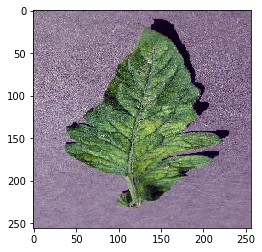

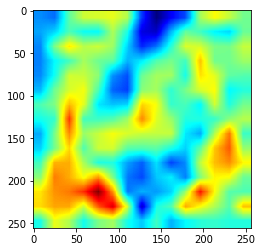

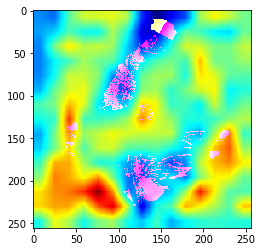

Tomato_mosaic_virus


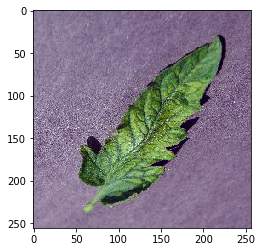

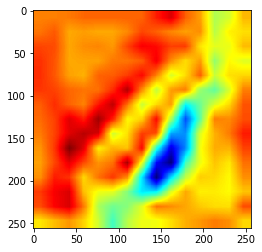

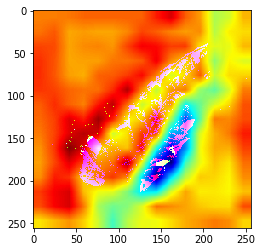

Tomato_mosaic_virus


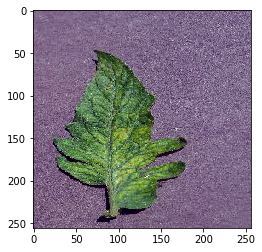

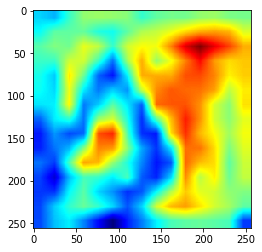

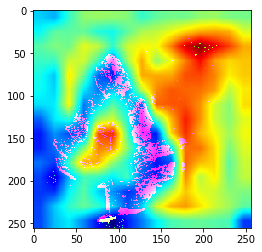

Tomato_mosaic_virus


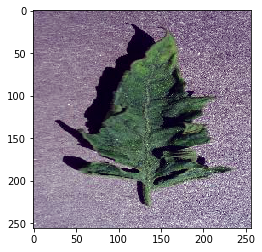

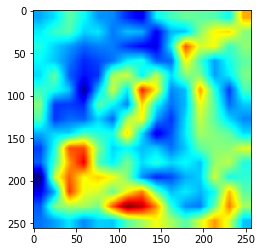

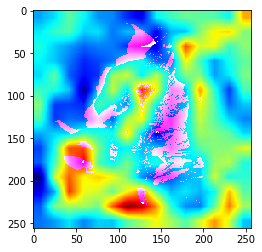

Tomato_mosaic_virus


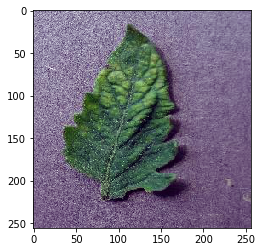

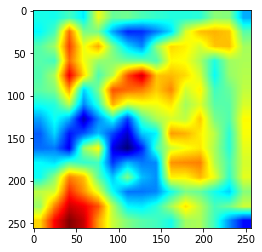

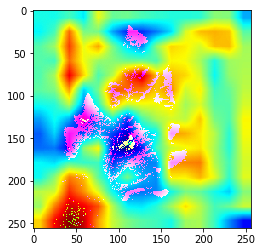

Tomato_mosaic_virus


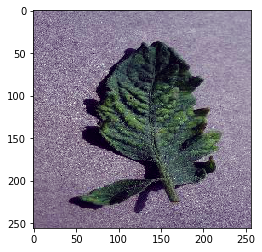

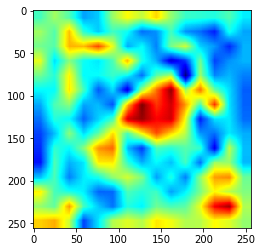

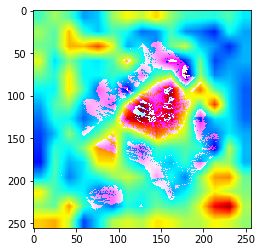

Tomato_mosaic_virus


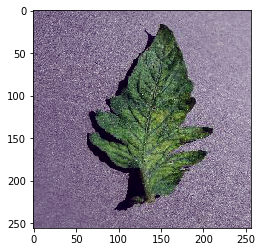

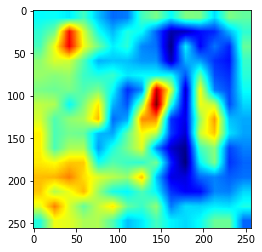

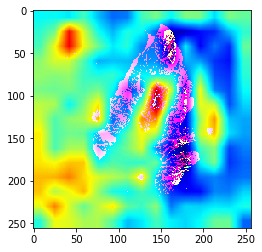

Tomato_mosaic_virus


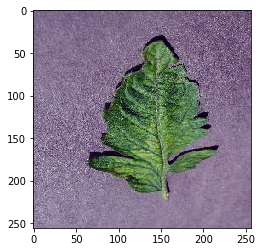

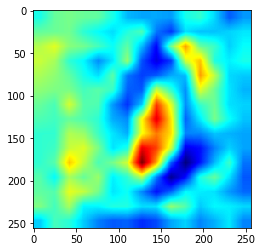

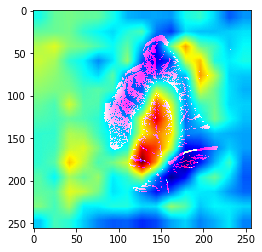

Tomato_mosaic_virus


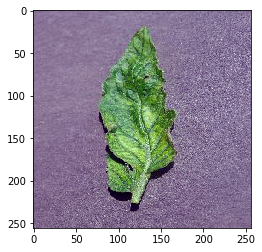

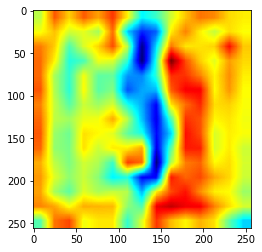

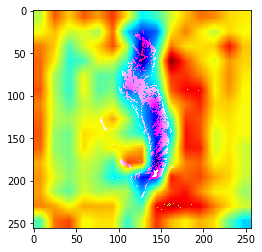

Tomato_mosaic_virus


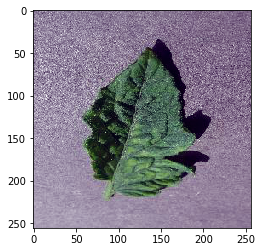

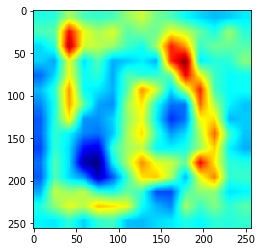

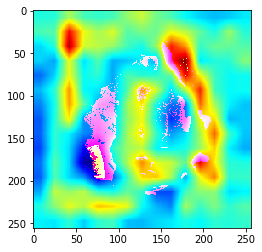

Tomato_mosaic_virus


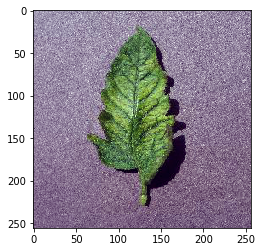

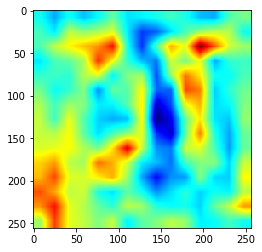

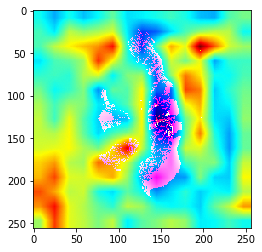

Tomato_mosaic_virus


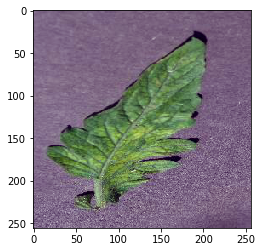

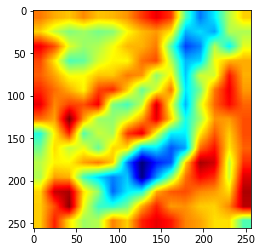

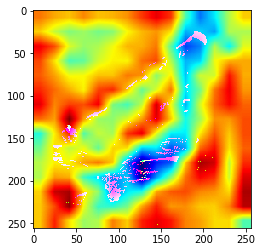

Tomato_mosaic_virus


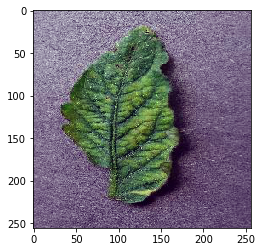

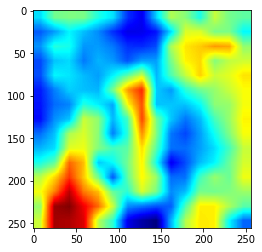

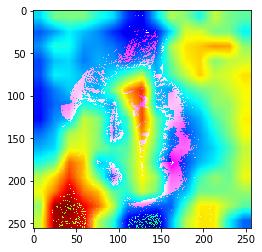

Tomato_mosaic_virus


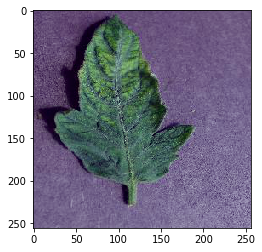

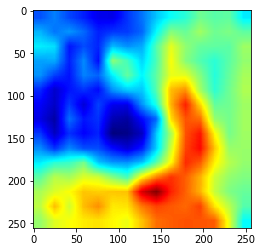

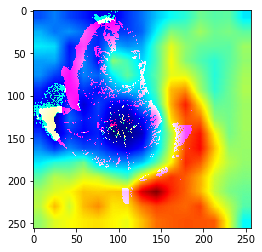

Tomato_mosaic_virus


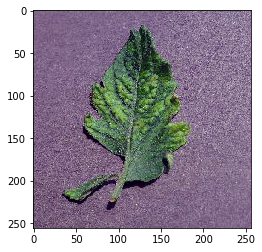

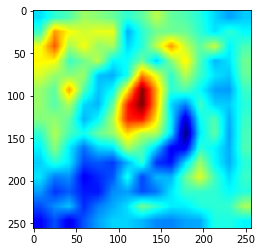

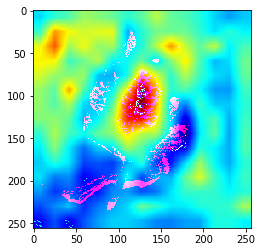

Tomato_mosaic_virus


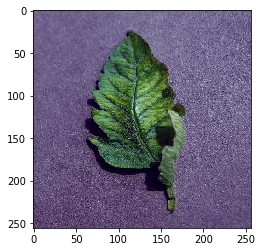

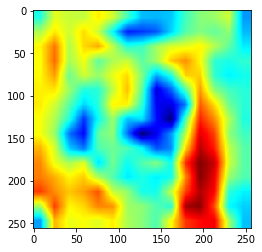

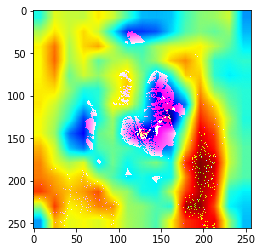

Tomato_mosaic_virus


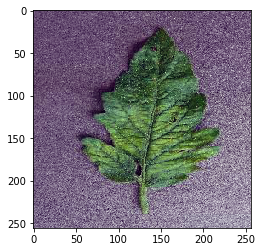

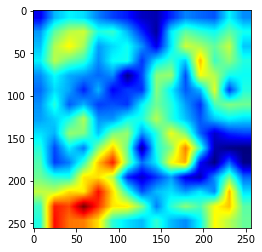

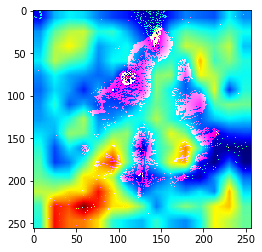

Tomato_mosaic_virus


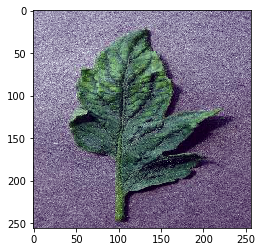

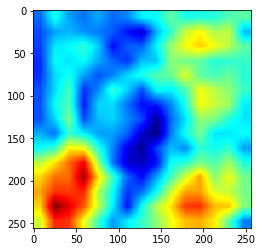

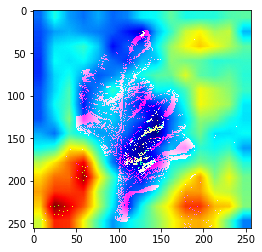

Tomato_mosaic_virus


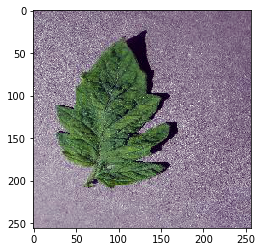

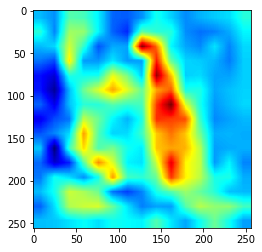

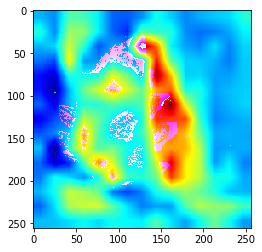

Tomato_mosaic_virus


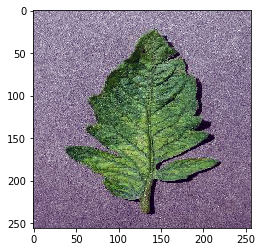

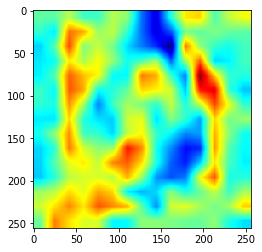

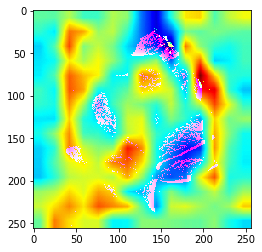

In [9]:
file_name_to_export = "prova"
grad_cam = GradCam(model, target_layer=11)
model.train()
#with torch.no_grad():
for data in test_dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    for i in range(len(inputs)):
        if(labels[i] == 8):
            original = np.transpose(inputs[i].numpy(),(1,2,0))
            single_input = inputs[i].unsqueeze_(0)
            cam = grad_cam.generate_cam(single_input, labels[i])
            print(classes[labels[i]])
            image_show(original)
            show_class_activation_on_image(original, cam)
            #save_class_activation_on_image(np.transpose(inputs[i].numpy(),(1,2,0)), cam, file_name_to_export)
        
        #cam = grad_cam.generate_cam(inputs, labels)
        #save_class_activation_on_image(original_image, cam, file_name_to_export)
